<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [39]:
df = pd.read_csv(file_name)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [6]:
df.duplicated().sum()

0

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


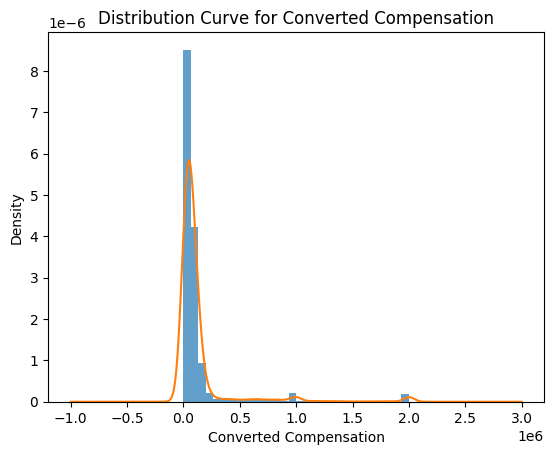

In [7]:
# Import libraries
import scipy
import matplotlib.pyplot as plt
# Plot the distribution curve
df['ConvertedComp'].plot.hist(bins=30, density=True, alpha=0.7) # Histogram with density=True to match KDE scale
df['ConvertedComp'].plot.kde()
plt.title('Distribution Curve for Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


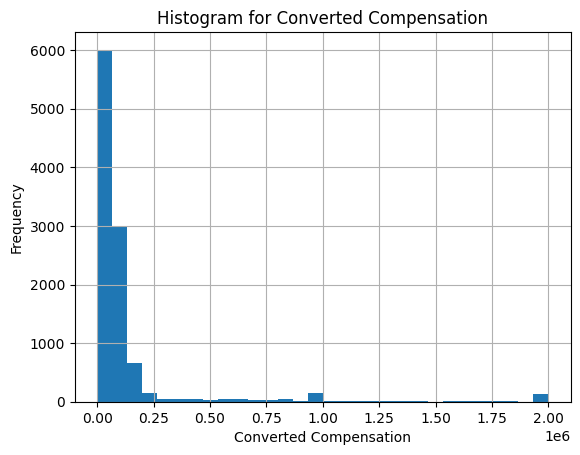

In [8]:
# your code goes here
df['ConvertedComp'].hist(bins=30)
plt.title('Histogram for Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [16]:
# The mean of the respondent who are women
W = df.groupby('Gender')['ConvertedComp'].median()
print( f'The mean of the respondent who are women is {W.Woman}')

The mean of the respondent who are women is 57708.0


How many responders identified themselves only as a **Man**?


In [10]:
# your code goes here
g=df['Gender'].value_counts()
print(f'There are {g.Man} responders identifying themselves only as a Man')

There are 10480 responders identifying themselves only as a Man


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
g=df['Gender'].value_counts()
print(f'There are {g.Woman} responders identifying themselves only as a Woman')

There are 731 responders identifying themselves only as a Woman


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [13]:
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


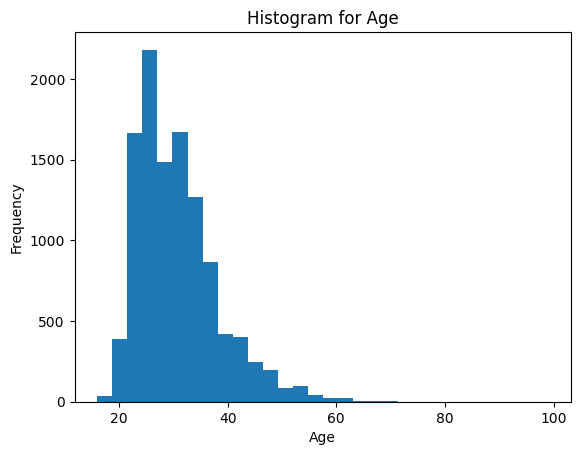

In [44]:
# your code goes here
df['Age'].plot.hist(bins=30)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


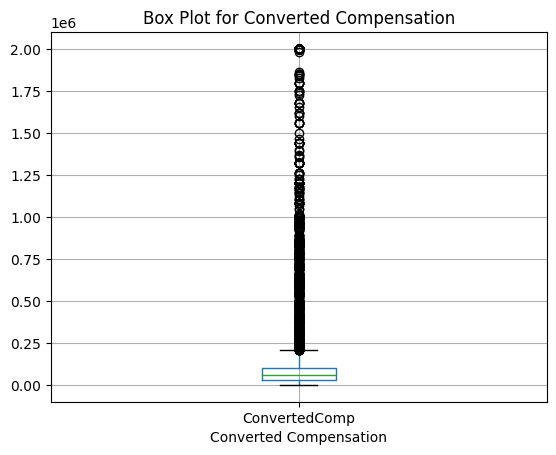

In [51]:
# your code goes here
df.boxplot(column = 'ConvertedComp')
plt.title('Box Plot for Converted Compensation')
plt.xlabel('Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [53]:
# your code goes here
df['ConvertedComp'].describe()


count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Find out the upper and lower bounds.


In [18]:
# your code goes here
Q1=df['ConvertedComp'].quantile(0.25)
Q3=df['ConvertedComp'].quantile(0.75)
IQR=Q3-Q1
IQR

73132.0

Identify how many outliers are there in the `ConvertedComp` column.


In [21]:
# your code goes here
lowerbound = Q1 - 1.5*IQR
print(lowerbound)
upperbound = Q3 + 1.5*IQR
print(upperbound)
outliners = df[(df['ConvertedComp'] < lowerbound)|(df['ConvertedComp'] > upperbound)]
outliners.shape


-82830.0
209698.0


(879, 85)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [27]:
# the median ConvertedComp after removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lowerbound) & (df['ConvertedComp'] <= upperbound)]
df_no_outliers['ConvertedComp'].median()

52704.0

In [28]:
# the mean ConvertedComp after removing outliers
df_no_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [41]:
# Create a dataframe including only numerical data
df_num = df.select_dtypes(include='number')
df_num.head()
# Correlation between numerical columns
df_num.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
